# Project 3: Collaborative Filtering

**Authors**
* Zhiyuan Chen, chen0error@g.ucla.edu
* Ranjana Vittal, ranjanavittal@g.ucla.edu
* Krish Kabra, krish97@g.ucla.edu

In [1]:
import sys, os
from time import time

!pip install scikit-surprise

runningOnColab = 'google.colab' in sys.modules
if runningOnColab:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)
  # Please link EE 219 folder to your personal drive directory under the following path
  %cd '/content/drive/My Drive/Colab Notebooks/EE 219/Project 3' 
  %ls
  !pip freeze > requirements.txt

     |████████████████████████████████| 11.8MB 5.1MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1618254 sha256=d13c98ceb1dad355c09ad7ff7267ae99803dd0292f10ab0e09aac4f64fe6822a
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/EE 219/Project 3
ml-latest-small.zip  ratings.csv


In [4]:
#load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

if not os.path.isdir('ml-latest-small'):
  !unzip "ml-latest-small.zip" -d "ml-latest-small/"

In [6]:
ratings = pd.read_csv("ml-latest-small/ratings.csv")

## MovieLens dataset

#### Question 1: Compute the sparsity of the movie rating dataset

In [ ]:
user_id = ratings['userId'].values
movie_id = ratings['movieId'].values
rating = ratings['rating'].values

sparsity = len(ratings)/float(len(set(movie_id))*len(set(user_id)))
print("Sparsity: ", sparsity)

Sparsity:  0.016999683055613623


#### Question 2: Plot a histogram showing the frequency of the rating values



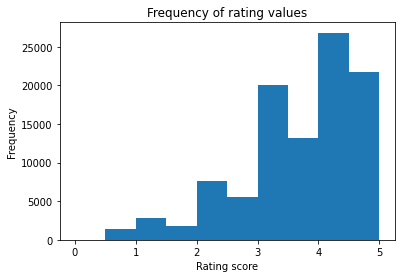

In [ ]:
bins = np.linspace(0,5,num=11)
plt.hist(rating,bins=bins)
plt.xlabel("Rating score")
plt.ylabel("Frequency")
plt.title("Frequency of rating values")
plt.savefig('figures/q2_histogram', dpi=300, transparent=True)

#### Question 3: Plot the distribution of the number of ratings received among movies

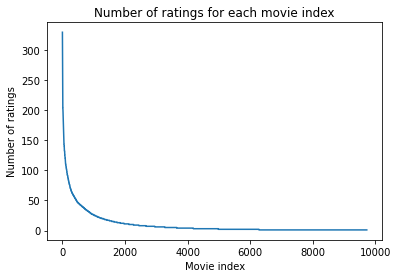

In [ ]:
from collections import Counter

counter = Counter(movie_id)
num_ratings = sorted(list(counter.values()),reverse=True)
plt.plot(num_ratings)
plt.xlabel("Movie index")
plt.ylabel("Number of ratings")
plt.title("Number of ratings for each movie index")
plt.savefig('figures/q3_movieIndexDist', dpi=300, transparent=True)

#### Question 4: Plot the distribution of ratings among users

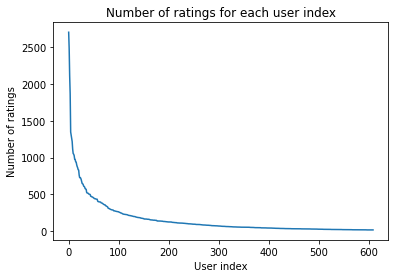

In [ ]:
counter = Counter(user_id)
num_users = sorted(list(counter.values()),reverse=True)
plt.plot(num_users)
plt.xlabel("User index")
plt.ylabel("Number of ratings")
plt.title("Number of ratings for each user index")
plt.savefig('figures/q4_userRatingDist', dpi=300, transparent=True)


#### Question 6: Compute the variance of the rating values received by each movie

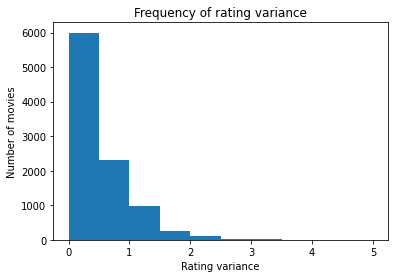

In [ ]:
from surprise import Dataset, Reader

reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1, rating_scale=(0.5, 5))
file_path = "ml-latest-small/ratings.csv"
data = Dataset.load_from_file(file_path, reader=reader)

ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])

var = {}
for i in ref.keys():
    var[i] = np.var(ref[i])

var_val = list(var.values())
bins = np.linspace(0,5,num=11)
plt.figure()
plt.hist(var_val,bins=bins)
plt.xlabel("Rating variance")
plt.ylabel("Number of movies")
plt.title("Frequency of rating variance")
plt.savefig('figures/q6_ratingVarHist', dpi=300, transparent=True)
plt.show()

## Neighborhood-based collaborative filtering

### k-NN collaborative filter

In [ ]:
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate, KFold, train_test_split
from surprise import accuracy
from sklearn.metrics import roc_curve, auc

from surprise.prediction_algorithms.knns import KNNWithMeans

reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1, rating_scale=(0.5, 5))
file_path = "ml-latest-small/ratings.csv"
data = Dataset.load_from_file(file_path, reader=reader)

kf = KFold(n_splits=10)

#### Question 10: k-NN collaborative filter to predict the ratings of the movies in the MovieLens dataset
---



k=2 done in 15.349s
k=4 done in 15.681s
k=6 done in 16.382s
k=8 done in 16.597s
k=10 done in 18.504s
k=12 done in 18.178s
k=14 done in 17.513s
k=16 done in 17.667s
k=18 done in 18.011s
k=20 done in 18.132s
k=22 done in 18.442s
k=24 done in 18.679s
k=26 done in 18.687s
k=28 done in 19.118s
k=30 done in 20.148s
k=32 done in 19.436s
k=34 done in 19.124s
k=36 done in 19.592s
k=38 done in 19.390s
k=40 done in 19.578s
k=42 done in 19.862s
k=44 done in 21.370s
k=46 done in 20.192s
k=48 done in 19.955s
k=50 done in 19.894s
k=52 done in 20.015s
k=54 done in 19.954s
k=56 done in 20.035s
k=58 done in 20.040s
k=60 done in 20.165s
k=62 done in 22.071s
k=64 done in 20.437s
k=66 done in 20.493s
k=68 done in 20.542s
k=70 done in 20.200s
k=72 done in 20.361s
k=74 done in 20.448s
k=76 done in 22.314s
k=78 done in 20.872s
k=80 done in 20.434s
k=82 done in 20.820s
k=84 done in 20.446s
k=86 done in 20.710s
k=88 done in 20.544s
k=90 done in 20.826s
k=92 done in 22.575s
k=94 done in 20.716s
k=96 done in 20.5

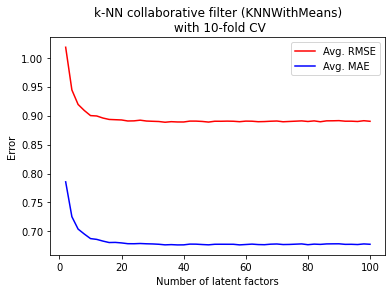

In [ ]:
avg_rmse = []
avg_mae = []
k = np.linspace(2,100,dtype=int)
for i in k:
    t0 = time()
    perf = cross_validate(KNNWithMeans(k=i,sim_options={'name':'pearson'},verbose=False),data,cv=10,verbose=False)
    print("k=%i done in %0.3fs" % (i,time() - t0))
    avg_rmse.append(np.mean(perf['test_rmse']))
    avg_mae.append(np.mean(perf['test_mae']))

min_rmse = min(avg_rmse)
k_min_rmse = k[avg_rmse.index(min_rmse)]
print(f'Min RMSE: k={k_min_rmse}, RMSE={min_rmse}')
min_mae = min(avg_mae)
k_min_mae = k[avg_mae.index(min_mae)]
print(f'Min MAE: k={k_min_mae}, RMSE={min_mae}')

fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Avg. RMSE')
ax.plot(k, avg_mae, 'b', label='Avg. MAE')
ax.legend(loc='best')
plt.xlabel("Number of latent factors")
plt.ylabel("Error")
plt.title("k-NN collaborative filter (KNNWithMeans)\n with 10-fold CV")
plt.savefig('figures/q10_knn_acc', dpi=300, transparent=True)
plt.show()

#### Question 12: k-NN collaborative filter to predict the ratings of the movies in the popular movie trimmed test set

k=2 done in 17.631s
k=4 done in 16.286s
k=6 done in 16.626s
k=8 done in 16.788s
k=10 done in 17.248s
k=12 done in 18.235s
k=14 done in 17.486s
k=16 done in 17.408s
k=18 done in 17.959s
k=20 done in 18.308s
k=22 done in 18.701s
k=24 done in 18.842s
k=26 done in 18.426s
k=28 done in 18.599s
k=30 done in 18.877s
k=32 done in 20.868s
k=34 done in 20.159s
k=36 done in 19.185s
k=38 done in 19.490s
k=40 done in 19.411s
k=42 done in 19.997s
k=44 done in 19.782s
k=46 done in 20.446s
k=48 done in 19.670s
k=50 done in 20.271s
k=52 done in 20.793s
k=54 done in 19.914s
k=56 done in 19.928s
k=58 done in 19.636s
k=60 done in 20.153s
k=62 done in 20.012s
k=64 done in 20.302s
k=66 done in 20.595s
k=68 done in 20.097s
k=70 done in 21.972s
k=72 done in 20.503s
k=74 done in 20.629s
k=76 done in 20.185s
k=78 done in 23.748s
k=80 done in 20.346s
k=82 done in 20.580s
k=84 done in 20.448s
k=86 done in 21.037s
k=88 done in 21.158s
k=90 done in 20.594s
k=92 done in 20.420s
k=94 done in 22.217s
k=96 done in 22.1

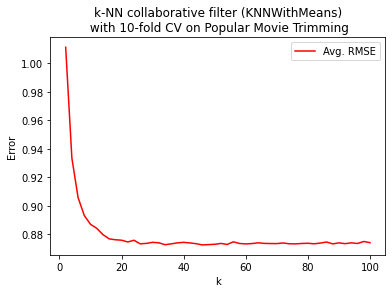

In [ ]:
k = np.linspace(2,100,dtype=int)
avg_rmse = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])

for i in k:
    t0 = time()
    rmse = 0
    for trainset, testset in kf.split(data):
        pop_trim = [j for j in testset if len(ref[j[1]]) > 2]
        pred = KNNWithMeans(k=i,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(pop_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    print("k=%i done in %0.3fs" % (i,time() - t0))
    avg_rmse.append(rmse/10.0)

min_rmse = min(avg_rmse)
k_min_rmse = k[avg_rmse.index(min_rmse)]
print(f'Min RMSE on popular movie trimmed test set: k={k_min_rmse}, RMSE={min_rmse}')

fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Avg. RMSE')
ax.legend(loc='best')
plt.xlabel("k")
plt.ylabel("Error")
plt.title("k-NN collaborative filter (KNNWithMeans)\n with 10-fold CV on Popular Movie Trimming")
plt.savefig('figures/q12_knn_pop', dpi=300, transparent=True)
plt.show()

#### Question 13: k-NN collaborative filter to predict the ratings of the movies in the unpopular movie trimmed test set

k=2 done in 9.177s
k=4 done in 9.092s
k=6 done in 9.137s
k=8 done in 8.940s
k=10 done in 9.139s
k=12 done in 8.941s
k=14 done in 9.612s
k=16 done in 10.055s
k=18 done in 9.698s
k=20 done in 9.181s
k=22 done in 9.324s
k=24 done in 9.256s
k=26 done in 9.378s
k=28 done in 9.048s
k=30 done in 10.698s
k=32 done in 9.291s
k=34 done in 9.341s
k=36 done in 9.411s
k=38 done in 9.246s
k=40 done in 9.010s
k=42 done in 9.324s
k=44 done in 9.201s
k=46 done in 8.983s
k=48 done in 9.478s
k=50 done in 10.320s
k=52 done in 9.454s
k=54 done in 9.291s
k=56 done in 9.248s
k=58 done in 9.367s
k=60 done in 9.377s
k=62 done in 9.576s
k=64 done in 9.471s
k=66 done in 9.230s
k=68 done in 8.968s
k=70 done in 9.341s
k=72 done in 9.145s
k=74 done in 9.130s
k=76 done in 9.263s
k=78 done in 8.986s
k=80 done in 9.140s
k=82 done in 9.157s
k=84 done in 10.165s
k=86 done in 11.230s
k=88 done in 9.181s
k=90 done in 9.130s
k=92 done in 9.074s
k=94 done in 9.099s
k=96 done in 8.888s
k=98 done in 9.306s
k=100 done in 9.309

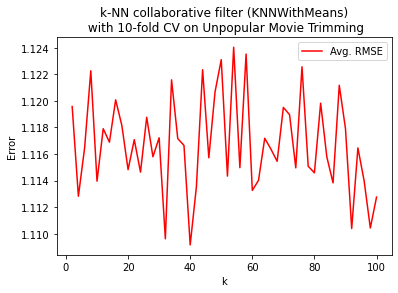

In [ ]:
k = np.linspace(2,100,dtype=int)
avg_rmse = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])

for i in k:
    t0 = time()
    rmse = 0
    for trainset, testset in kf.split(data):
        unpop_trim = [j for j in testset if len(ref[j[1]]) <= 2]
        pred = KNNWithMeans(k=i,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(unpop_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    print("k=%i done in %0.3fs" % (i,time() - t0))
    avg_rmse.append(rmse/10.0)

min_rmse = min(avg_rmse)
k_min_rmse = k[avg_rmse.index(min_rmse)]
print(f'Min RMSE on unpopular movie trimmed test set: k={k_min_rmse}, RMSE={min_rmse}')

fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Avg. RMSE')
ax.legend(loc='best')
plt.xlabel("k")
plt.ylabel("Error")
plt.title("k-NN collaborative filter (KNNWithMeans)\n with 10-fold CV on Unpopular Movie Trimming")
plt.savefig('figures/q13_knn_unpop', dpi=300, transparent=True)
plt.show()

#### Question 14: k-NN collaborative filter to predict the ratings of the movies in the high variance movie trimmed test set

k=2 done in 11.608s
k=4 done in 11.405s
k=6 done in 11.088s
k=8 done in 11.176s
k=10 done in 11.431s
k=12 done in 11.854s
k=14 done in 12.038s
k=16 done in 11.138s
k=18 done in 11.180s
k=20 done in 11.248s
k=22 done in 11.554s
k=24 done in 11.171s
k=26 done in 11.226s
k=28 done in 11.405s
k=30 done in 13.128s
k=32 done in 11.692s
k=34 done in 11.466s
k=36 done in 11.423s
k=38 done in 11.425s
k=40 done in 11.320s
k=42 done in 11.726s
k=44 done in 11.986s
k=46 done in 11.474s
k=48 done in 11.162s
k=50 done in 11.259s
k=52 done in 11.131s
k=54 done in 11.255s
k=56 done in 11.262s
k=58 done in 11.224s
k=60 done in 11.491s
k=62 done in 11.973s
k=64 done in 11.679s
k=66 done in 12.538s
k=68 done in 11.361s
k=70 done in 12.832s
k=72 done in 11.896s
k=74 done in 11.755s
k=76 done in 11.507s
k=78 done in 11.138s
k=80 done in 11.727s
k=82 done in 11.600s
k=84 done in 11.723s
k=86 done in 11.660s
k=88 done in 11.539s
k=90 done in 11.432s
k=92 done in 11.579s
k=94 done in 11.523s
k=96 done in 11.3

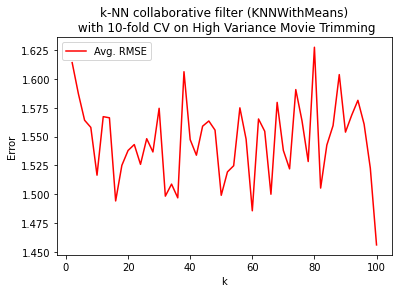

In [ ]:
k = np.linspace(2,100,dtype=int)
avg_rmse = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])
        
for i in k:
    t0 = time()
    rmse = 0
    for trainset, testset in kf.split(data):        
        highvar_trim = [j for j in testset if (len(ref[j[1]]) >= 5 and np.var(ref[j[1]]) >= 2)]
        pred = KNNWithMeans(k=i,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(highvar_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    print("k=%i done in %0.3fs" % (i,time() - t0))
    avg_rmse.append(rmse/10.0)

min_rmse = min(avg_rmse)
k_min_rmse = k[avg_rmse.index(min_rmse)]
print(f'Min RMSE on high variance movie trimmed test set: k={k_min_rmse}, RMSE={min_rmse}')

fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Avg. RMSE')
ax.legend(loc='best')
plt.xlabel("k")
plt.ylabel("Error")
plt.title("k-NN collaborative filter (KNNWithMeans)\n with 10-fold CV on High Variance Movie Trimming")
plt.savefig('figures/q14_knn_highvar', dpi=300, transparent=True)
plt.show()

#### Question 15: Plot the ROC curves for the k-NN collaborative filter designed in question 10 for threshold values [2.5, 3, 3.5, 4]. For the ROC plotting use the k found in question 11. For each of the plots, also report the area under the curve (AUC) value.

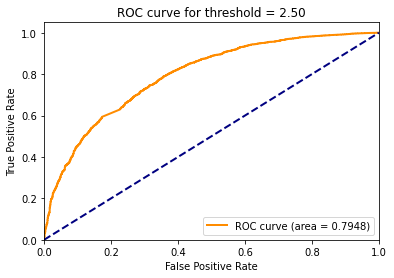

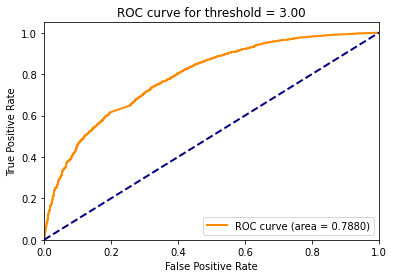

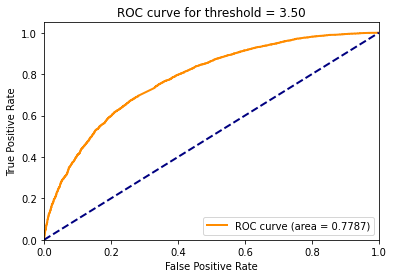

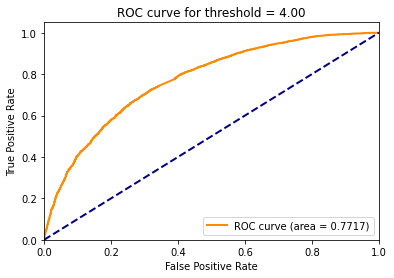

In [ ]:
trainset, testset = train_test_split(data, test_size=.1)
best_k_knn = 20
pred = KNNWithMeans(k=best_k_knn,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(testset)
threshold = [2.5, 3, 3.5, 4]

for thresh in threshold: 
  y_true = [0 if i.r_ui < thresh else 1 for i in pred]
  y_score = [i.est for i in pred]
  
  # for i in pred:
  #     if i.r_ui < thresh:
  #         y_true.append(0)
  #     else:
  #         y_true.append(1)
  # y_score = [i.est for i in pred]

  fpr = dict();tpr = dict();roc_auc = dict()
  fpr, tpr, thresholds = roc_curve(y_true, y_score)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  lw = 2
  plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curve for threshold = %0.2f' % thresh);plt.legend(loc="lower right")
  plt.savefig(f'figures/q15_knn_roc_thresh_{str(thresh).replace(".","p")}', dpi=300, transparent=True)
  plt.show()

## Model-based collaborative filtering

### Non-negative matrix factorization (NNMF)

In [ ]:
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate, KFold, train_test_split
from surprise import accuracy
from sklearn.metrics import roc_curve, auc

from surprise.prediction_algorithms.matrix_factorization import NMF

reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1, rating_scale=(0.5, 5))
file_path = "ml-latest-small/ratings.csv"
data = Dataset.load_from_file(file_path, reader=reader)

kf = KFold(n_splits=10)

#### Question 17+18: NNMF collaborative filter to predict the ratings of the movies in the MovieLens dataset

k=2 done in 48.372s
k=4 done in 54.768s
k=6 done in 60.878s
k=8 done in 61.150s
k=10 done in 68.440s
k=12 done in 73.634s
k=14 done in 79.980s
k=16 done in 80.961s
k=18 done in 87.042s
k=20 done in 91.537s
k=22 done in 93.405s
k=24 done in 93.877s
k=26 done in 101.298s
k=28 done in 102.151s
k=30 done in 106.425s
k=32 done in 108.062s
k=34 done in 113.923s
k=36 done in 117.445s
k=38 done in 123.660s
k=40 done in 124.694s
k=42 done in 131.505s
k=44 done in 133.356s
k=46 done in 139.592s
k=48 done in 139.897s
k=50 done in 144.153s
Min RMSE: k=16, RMSE=0.9121067626592827
Min MAE: k=18, RMSE=0.6943231334307327


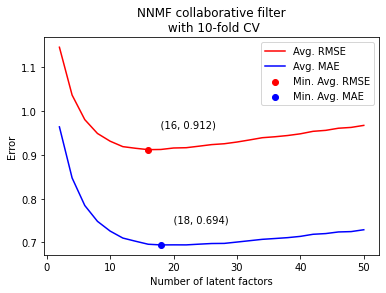

In [ ]:
avg_rmse = []
avg_mae = []
k = np.arange(2,52,2)
for i in k:
    t0 = time()
    perf = cross_validate(NMF(n_factors=i,biased=False),data,cv=10,verbose=False)
    print("k=%i done in %0.3fs" % (i,time() - t0))
    avg_rmse.append(np.mean(perf['test_rmse']))
    avg_mae.append(np.mean(perf['test_mae']))

min_rmse = min(avg_rmse)
k_min_rmse = k[avg_rmse.index(min_rmse)]
print(f'Min RMSE: k={k_min_rmse}, RMSE={min_rmse}')
min_mae = min(avg_mae)
k_min_mae = k[avg_mae.index(min_mae)]
print(f'Min MAE: k={k_min_mae}, MAE={min_mae}')

fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Avg. RMSE')
ax.scatter(k_min_rmse,min_rmse,c='r',label='Min. Avg. RMSE')
ax.annotate('    (%i, %.3f)' % (k_min_rmse,min_rmse), xy=(k_min_rmse,0.05+min_rmse), textcoords='data')
ax.plot(k, avg_mae, 'b', label='Avg. MAE')
ax.scatter(k_min_mae,min_mae,c='b',label='Min. Avg. MAE')
ax.annotate('    (%i, %.3f)' % (k_min_mae,min_mae), xy=(k_min_mae,0.05+min_mae), textcoords='data')
ax.legend(loc='best')
plt.xlabel("Number of latent factors")
plt.ylabel("Error")
plt.title("NNMF collaborative filter\n with 10-fold CV")
plt.savefig('figures/q17_nnmf_acc', dpi=300, transparent=True)
plt.show()

#### Question 19: NNMF collaborative filter to predict the ratings of the movies in the popular movie trimmed test set

k=2 done in 50.175s
k=4 done in 57.652s
k=6 done in 59.635s
k=8 done in 61.669s
k=10 done in 66.625s
k=12 done in 72.997s
k=14 done in 82.233s
k=16 done in 82.512s
k=18 done in 89.502s
k=20 done in 95.458s
k=22 done in 97.946s
k=24 done in 96.062s
k=26 done in 105.391s
k=28 done in 110.432s
k=30 done in 115.521s
k=32 done in 120.568s
k=34 done in 125.177s
k=36 done in 130.180s
k=38 done in 137.818s
k=40 done in 136.277s
k=42 done in 150.573s
k=44 done in 147.261s
k=46 done in 154.427s
k=48 done in 156.213s
k=50 done in 164.214s
Min RMSE on popular movie trimmed test set: k=16, RMSE=0.8927949119479364


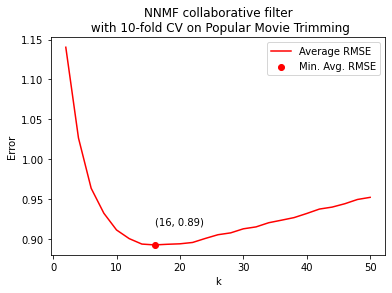

In [ ]:
k = np.arange(2,52,2)
avg_rmse = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])

for i in k:
    t0 = time()
    rmse = 0
    for trainset, testset in kf.split(data):
        pop_trim = [j for j in testset if len(ref[j[1]]) > 2]
        pred = NMF(n_factors=i,biased=False).fit(trainset).test(pop_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    print("k=%i done in %0.3fs" % (i,time() - t0))
    avg_rmse.append(rmse/10.0)

min_rmse = min(avg_rmse)
k_min_rmse = k[avg_rmse.index(min_rmse)]
print(f'Min RMSE on popular movie trimmed test set: k={k_min_rmse}, RMSE={min_rmse}')

fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Average RMSE')
ax.scatter(k_min_rmse,min_rmse,c='r',label='Min. Avg. RMSE')
ax.annotate('(%i, %.2f)' % (k_min_rmse,min_rmse), xy=(k_min_rmse,0.025+min_rmse), textcoords='data')
ax.legend(loc='best')
plt.xlabel("k")
plt.ylabel("Error")
plt.title("NNMF collaborative filter\n with 10-fold CV on Popular Movie Trimming")
plt.savefig('figures/q19_nnmf_pop', dpi=300, transparent=True)
plt.show()

#### Question 20: NNMF collaborative filter to predict the ratings of the movies in the unpopular movie trimmed test set

k=2 done in 49.718s
k=4 done in 52.344s
k=6 done in 62.354s
k=8 done in 64.705s
k=10 done in 68.825s
k=12 done in 74.563s
k=14 done in 86.649s
k=16 done in 84.850s
k=18 done in 89.561s
k=20 done in 98.194s
k=22 done in 96.745s
k=24 done in 95.073s
k=26 done in 109.551s
k=28 done in 116.138s
k=30 done in 113.738s
k=32 done in 119.642s
k=34 done in 125.414s
k=36 done in 126.456s
k=38 done in 142.597s
k=40 done in 133.930s
k=42 done in 138.833s
k=44 done in 145.258s
k=46 done in 150.189s
k=48 done in 148.547s
k=50 done in 153.086s
Min RMSE on unpopular movie trimmed test set: k=48, RMSE=1.1746053689039906


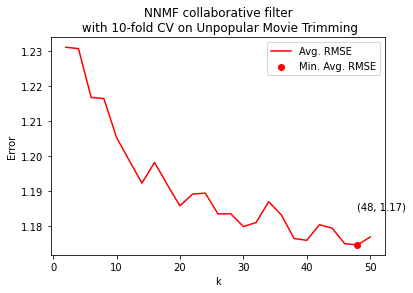

In [ ]:
k = np.arange(2,52,2)
avg_rmse = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])

for i in k:
    t0 = time()
    rmse = 0
    for trainset, testset in kf.split(data):
        unpop_trim = [j for j in testset if len(ref[j[1]]) <= 2]
        pred = NMF(n_factors=i,biased=False).fit(trainset).test(unpop_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    print("k=%i done in %0.3fs" % (i,time() - t0))
    avg_rmse.append(rmse/10.0)

min_rmse = min(avg_rmse)
k_min_rmse = k[avg_rmse.index(min_rmse)]
print(f'Min RMSE on unpopular movie trimmed test set: k={k_min_rmse}, RMSE={min_rmse}')

fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Avg. RMSE')
ax.scatter(k_min_rmse,min_rmse,c='r',label='Min. Avg. RMSE')
ax.annotate('(%i, %.2f)' % (k_min_rmse,min_rmse), xy=(k_min_rmse,0.01+min_rmse), textcoords='data')
ax.legend(loc='best')
plt.xlabel("k")
plt.ylabel("Error")
plt.title("NNMF collaborative filter\n with 10-fold CV on Unpopular Movie Trimming")
plt.savefig('figures/q20_nnmf_unpop', dpi=300, transparent=True)
plt.show()

#### Question 21:  NNMF collaborative filter to predict the ratings of the movies in the high variance movie trimmed test set

k=2 done in 49.251s
k=4 done in 56.405s
k=6 done in 58.411s
k=8 done in 62.485s
k=10 done in 69.888s
k=12 done in 75.123s
k=14 done in 80.986s
k=16 done in 83.686s
k=18 done in 93.526s
k=20 done in 98.661s
k=22 done in 101.035s
k=24 done in 102.307s
k=26 done in 111.648s
k=28 done in 112.307s
k=30 done in 118.113s
k=32 done in 120.150s
k=34 done in 125.873s
k=36 done in 127.034s
k=38 done in 134.892s
k=40 done in 137.085s
k=42 done in 143.484s
k=44 done in 148.441s
k=46 done in 154.416s
k=48 done in 150.998s
k=50 done in 157.793s
Min RMSE on high variance movie trimmed test set: k=44, RMSE=1.6256578822924233


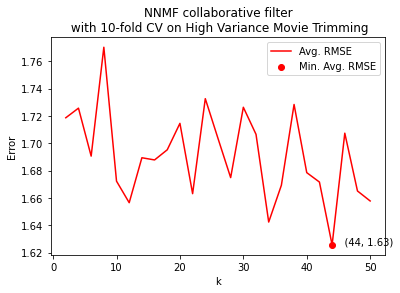

In [ ]:
k = np.arange(2,52,2)
avg_rmse = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])
        
for i in k:
    t0 = time()
    rmse = 0
    for trainset, testset in kf.split(data):        
        highvar_trim = [j for j in testset if (len(ref[j[1]]) >= 5 and np.var(ref[j[1]]) >= 2)]
        pred = NMF(n_factors=i,biased=False).fit(trainset).test(highvar_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    print("k=%i done in %0.3fs" % (i,time() - t0))
    avg_rmse.append(rmse/10.0)

min_rmse = min(avg_rmse)
k_min_rmse = k[avg_rmse.index(min_rmse)]
print(f'Min RMSE on high variance movie trimmed test set: k={k_min_rmse}, RMSE={min_rmse}')

fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Avg. RMSE')
ax.scatter(k_min_rmse,min_rmse,c='r',label='Min. Avg. RMSE')
ax.annotate('    (%i, %.2f)' % (k_min_rmse,min_rmse), xy=(k_min_rmse,min_rmse), textcoords='data')
ax.legend(loc='best')
plt.xlabel("k")
plt.ylabel("Error")
plt.title("NNMF collaborative filter\n with 10-fold CV on High Variance Movie Trimming")
plt.savefig('figures/q21_nnmf_highvar', dpi=300, transparent=True)
plt.show()

#### Question 22: Performance evaluation using ROC curve for the NNMF collaborative filter

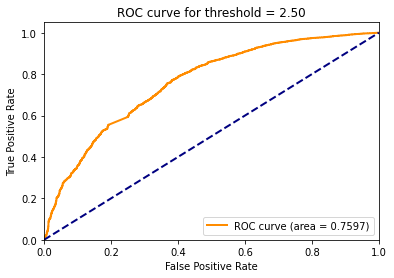

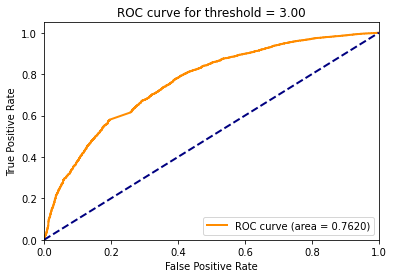

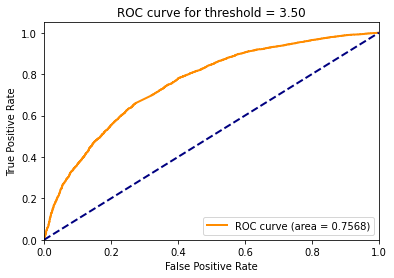

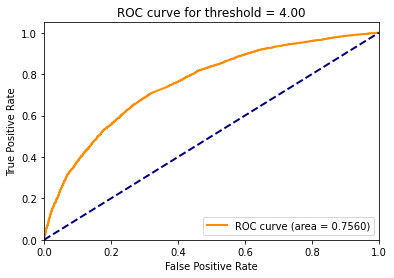

In [ ]:
trainset, testset = train_test_split(data, test_size=.1)
best_k_nnmf = 16
pred = NMF(n_factors=best_k_nnmf,biased=False).fit(trainset).test(testset)
threshold = [2.5, 3, 3.5, 4]

for thresh in threshold: 
  y_true = [0 if i.r_ui < thresh else 1 for i in pred]
  y_score = [i.est for i in pred]
   
  fpr = dict();tpr = dict();roc_auc = dict()
  fpr, tpr, thresholds = roc_curve(y_true, y_score)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  lw = 2
  plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curve for threshold = %0.2f' % thresh);plt.legend(loc="lower right")
  plt.savefig(f'figures/q22_nnmf_roc_thresh_{str(thresh).replace(".","p")}', dpi=300, transparent=True)
  plt.show()

#### Question 23: Interpretability of NNMF

In [ ]:
df_movies = pd.read_csv("ml-latest-small/movies.csv")
reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1, rating_scale=(0.5, 5))
file_path = "ml-latest-small/ratings.csv"
data = Dataset.load_from_file(file_path, reader=reader)
df_ratings = pd.read_csv(file_path)

trainset, testset = train_test_split(data, test_size=.1)
best_k_nnmf = 16 #20 before
nmf_fit = NMF(n_factors=best_k_nnmf,biased=False).fit(trainset)
V = nmf_fit.qi

for k in range(V.shape[1]): 
  print(f'Movie factor k={k+1}')
  movieFactor = np.array(V[:,k])
  movieFactor_sortedIndxs = np.flip(np.argsort(movieFactor))
  for movie_i in movieFactor_sortedIndxs[0:10]: 
    movieId = df_ratings.loc[movie_i]['movieId']
    genres = df_movies.loc[df_movies['movieId'] == movieId]['genres'].to_string()
    print(genres)
  print('=========================')

Movie factor k=1
686    Mystery|Thriller
1804    Action|Adventure|Thriller|War
337    Action|Adventure|Comedy|Romance|Thriller
926    Drama
1445    Comedy|Drama
5161    Action|Adventure|Drama|Sci-Fi|Thriller
8444    Action|Drama
1399    Action|Comedy|Crime|Thriller
398    Thriller
900    Action|Adventure
Movie factor k=2
645    Crime|Thriller
1400    Children|Comedy
273    Children|Drama|Fantasy|Mystery
599    Animation|Children|Comedy
161    Thriller
2974    Action|Sci-Fi|Thriller
615    Action|Adventure|Sci-Fi|Thriller
7415    Crime|Drama|Thriller
2264    Thriller
946    Comedy|Drama|Romance
Movie factor k=3
328    Action|Comedy
428    Drama
234    Comedy|Drama
9    Action|Adventure|Thriller
1987    Action|Sci-Fi
2031    Comedy|Romance
398    Thriller
7079    Drama|War
773    Adventure|Children|Drama
1049    Drama
Movie factor k=4
8285    Drama
508    Adventure|Drama|Western
1563    Comedy|Fantasy|Romance
2603    Adventure|Fantasy|Romance
197    Adventure|Comedy
1291    Drama|Romance

### Matrix factorization with bias (MF with bias)

In [ ]:
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate, KFold, train_test_split
from surprise import accuracy
from sklearn.metrics import roc_curve, auc

from surprise.prediction_algorithms.matrix_factorization import SVD

reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1, rating_scale=(0.5, 5))
file_path = "ml-latest-small/ratings.csv"
data = Dataset.load_from_file(file_path, reader=reader)

kf = KFold(n_splits=10)

#### Question 24+25: MF with bias collaborative filter to predict the ratings of the movies in the MovieLens dataset

k=2 done in 19.555s
k=4 done in 20.987s
k=6 done in 21.649s
k=8 done in 21.853s
k=10 done in 23.135s
k=12 done in 24.410s
k=14 done in 25.165s
k=16 done in 26.167s
k=18 done in 27.087s
k=20 done in 28.206s
k=22 done in 29.434s
k=24 done in 32.164s
k=26 done in 31.156s
k=28 done in 33.747s
k=30 done in 33.167s
k=32 done in 33.975s
k=34 done in 35.236s
k=36 done in 36.103s
k=38 done in 36.982s
k=40 done in 37.474s
k=42 done in 39.880s
k=44 done in 40.476s
k=46 done in 40.422s
k=48 done in 40.882s
k=50 done in 42.818s
Min RMSE: k=26, RMSE=0.8642425340771457
Min MAE: k=26, RMSE=0.6638737882629251


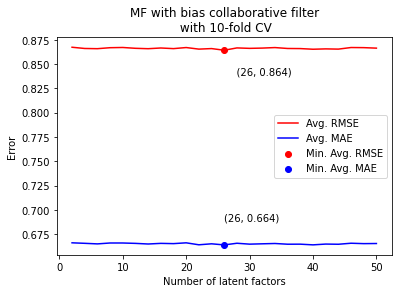

In [ ]:
avg_rmse = []
avg_mae = []
k = np.arange(2,52,2)
for i in k:
    t0 = time()
    perf = cross_validate(SVD(n_factors=i,biased=True),data,cv=10,verbose=False)
    print("k=%i done in %0.3fs" % (i,time() - t0))
    avg_rmse.append(np.mean(perf['test_rmse']))
    avg_mae.append(np.mean(perf['test_mae']))

min_rmse = min(avg_rmse)
k_min_rmse = k[avg_rmse.index(min_rmse)]
print(f'Min RMSE: k={k_min_rmse}, RMSE={min_rmse}')
min_mae = min(avg_mae)
k_min_mae = k[avg_mae.index(min_mae)]
print(f'Min MAE: k={k_min_mae}, MAE={min_mae}')

fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Avg. RMSE')
ax.scatter(k_min_rmse,min_rmse,c='r',label='Min. Avg. RMSE')
ax.annotate('    (%i, %.3f)' % (k_min_rmse,min_rmse), xy=(k_min_rmse,-0.025+min_rmse), textcoords='data')
ax.plot(k, avg_mae, 'b', label='Avg. MAE')
ax.scatter(k_min_mae,min_mae,c='b',label='Min. Avg. MAE')
ax.annotate('(%i, %.3f)' % (k_min_mae,min_mae), xy=(k_min_mae,0.025+min_mae), textcoords='data')
ax.legend(loc='best')
plt.xlabel("Number of latent factors")
plt.ylabel("Error")
plt.title("MF with bias collaborative filter\n with 10-fold CV")
plt.savefig('figures/q24_mfbias_acc', dpi=300, transparent=True)
plt.show()

#### Question 26: MF with bias collaborative filter to predict the ratings of the movies in the popular movie trimmed test set

k=2 done in 19.837s
k=4 done in 20.347s
k=6 done in 21.486s
k=8 done in 22.643s
k=10 done in 23.361s
k=12 done in 25.490s
k=14 done in 28.794s
k=16 done in 26.742s
k=18 done in 27.709s
k=20 done in 29.009s
k=22 done in 29.643s
k=24 done in 30.239s
k=26 done in 31.623s
k=28 done in 33.097s
k=30 done in 33.739s
k=32 done in 34.120s
k=34 done in 39.813s
k=36 done in 36.652s
k=38 done in 37.305s
k=40 done in 37.723s
k=42 done in 39.183s
k=44 done in 39.447s
k=46 done in 40.169s
k=48 done in 41.308s
k=50 done in 45.119s
Min RMSE on popular movie trimmed test set: k=50, RMSE=0.8571661598901098


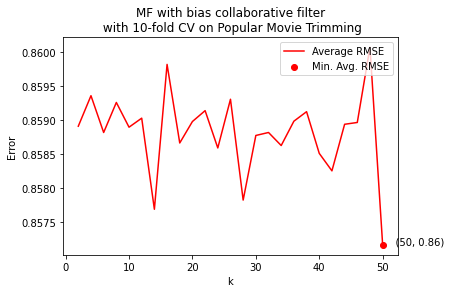

In [ ]:
k = np.arange(2,52,2)
avg_rmse = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])

for i in k:
    t0 = time()
    rmse = 0
    for trainset, testset in kf.split(data):
        pop_trim = [j for j in testset if len(ref[j[1]]) > 2]
        pred = SVD(n_factors=i,biased=True).fit(trainset).test(pop_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    print("k=%i done in %0.3fs" % (i,time() - t0))
    avg_rmse.append(rmse/10.0)

min_rmse = min(avg_rmse)
k_min_rmse = k[avg_rmse.index(min_rmse)]
print(f'Min RMSE on popular movie trimmed test set: k={k_min_rmse}, RMSE={min_rmse}')

fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Average RMSE')
ax.scatter(k_min_rmse,min_rmse,c='r',label='Min. Avg. RMSE')
ax.annotate('    (%i, %.2f)' % (k_min_rmse,min_rmse), xy=(k_min_rmse,min_rmse), textcoords='data')
ax.legend(loc='upper right')
plt.xlabel("k")
plt.ylabel("Error")
plt.title("MF with bias collaborative filter\n with 10-fold CV on Popular Movie Trimming")
plt.savefig('figures/q26_mfbias_pop', dpi=300, transparent=True)
plt.show()

#### Question 27: MF with bias collaborative filter to predict the ratings of the movies in the unpopular movie trimmed test set

k=2 done in 18.789s
k=4 done in 19.912s
k=6 done in 20.378s
k=8 done in 21.542s
k=10 done in 22.684s
k=12 done in 23.933s
k=14 done in 26.373s
k=16 done in 28.064s
k=18 done in 26.940s
k=20 done in 27.728s
k=22 done in 29.080s
k=24 done in 29.500s
k=26 done in 30.517s
k=28 done in 31.893s
k=30 done in 33.414s
k=32 done in 34.058s
k=34 done in 35.929s
k=36 done in 38.306s
k=38 done in 37.198s
k=40 done in 36.910s
k=42 done in 37.956s
k=44 done in 38.843s
k=46 done in 39.616s
k=48 done in 41.550s
k=50 done in 43.249s
Min RMSE on unpopular movie trimmed test set: k=50, RMSE=0.9712392451845513


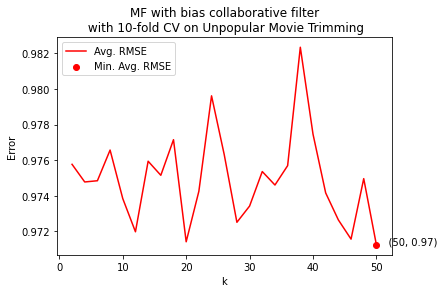

In [ ]:
k = np.arange(2,52,2)
avg_rmse = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])

for i in k:
    t0 = time()
    rmse = 0
    for trainset, testset in kf.split(data):
        unpop_trim = [j for j in testset if len(ref[j[1]]) <= 2]
        pred = SVD(n_factors=i,biased=True).fit(trainset).test(unpop_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    print("k=%i done in %0.3fs" % (i,time() - t0))
    avg_rmse.append(rmse/10.0)

min_rmse = min(avg_rmse)
k_min_rmse = k[avg_rmse.index(min_rmse)]
print(f'Min RMSE on unpopular movie trimmed test set: k={k_min_rmse}, RMSE={min_rmse}')

fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Avg. RMSE')
ax.scatter(k_min_rmse,min_rmse,c='r',label='Min. Avg. RMSE')
ax.annotate('    (%i, %.2f)' % (k_min_rmse,min_rmse), xy=(k_min_rmse,min_rmse), textcoords='data')
ax.legend(loc='best')
plt.xlabel("k")
plt.ylabel("Error")
plt.title("MF with bias collaborative filter\n with 10-fold CV on Unpopular Movie Trimming")
plt.savefig('figures/q27_mfbias_unpop', dpi=300, transparent=True)
plt.show()

#### Question 28:  MF with bias collaborative filter to predict the ratings of the movies in the high variance movie trimmed test set

k=2 done in 21.512s
k=4 done in 24.905s
k=6 done in 24.003s
k=8 done in 24.270s
k=10 done in 24.959s
k=12 done in 26.283s
k=14 done in 27.028s
k=16 done in 28.482s
k=18 done in 29.285s
k=20 done in 30.275s
k=22 done in 32.856s
k=24 done in 32.077s
k=26 done in 33.697s
k=28 done in 35.823s
k=30 done in 34.949s
k=32 done in 35.809s
k=34 done in 36.781s
k=36 done in 37.972s
k=38 done in 39.017s
k=40 done in 40.899s
k=42 done in 40.560s
k=44 done in 43.514s
k=46 done in 42.000s
k=48 done in 43.552s
k=50 done in 44.422s
Min RMSE on high variance movie trimmed test set: k=26, RMSE=1.4450257650369753


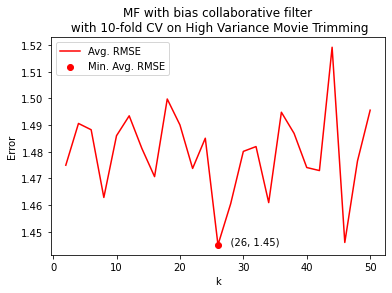

In [ ]:
k = np.arange(2,52,2)
avg_rmse = []
ref = {}
for j in data.raw_ratings:
    if j[1] in ref.keys():
        ref[j[1]].append(j[2])
    else:
        ref[j[1]] = []
        ref[j[1]].append(j[2])
        
for i in k:
    t0 = time()
    rmse = 0
    for trainset, testset in kf.split(data):        
        highvar_trim = [j for j in testset if (len(ref[j[1]]) >= 5 and np.var(ref[j[1]]) >= 2)]
        pred = SVD(n_factors=i,biased=True).fit(trainset).test(highvar_trim)
        rmse += accuracy.rmse(pred,verbose=False)
    print("k=%i done in %0.3fs" % (i,time() - t0))
    avg_rmse.append(rmse/10.0)

min_rmse = min(avg_rmse)
k_min_rmse = k[avg_rmse.index(min_rmse)]
print(f'Min RMSE on high variance movie trimmed test set: k={k_min_rmse}, RMSE={min_rmse}')

fig, ax = plt.subplots()
ax.plot(k,avg_rmse, 'r', label='Avg. RMSE')
ax.scatter(k_min_rmse,min_rmse,c='r',label='Min. Avg. RMSE')
ax.annotate('    (%i, %.2f)' % (k_min_rmse,min_rmse), xy=(k_min_rmse,min_rmse), textcoords='data')
ax.legend(loc='best')
plt.xlabel("k")
plt.ylabel("Error")
plt.title("MF with bias collaborative filter\n with 10-fold CV on High Variance Movie Trimming")
plt.savefig('figures/q28_mfbias_highvar', dpi=300, transparent=True)
plt.show()

#### Question 29: Performance evaluation using ROC curve for the MF with bias collaborative filter

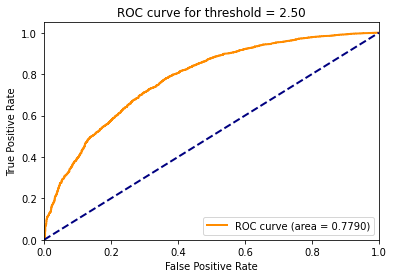

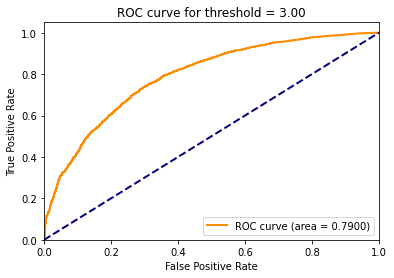

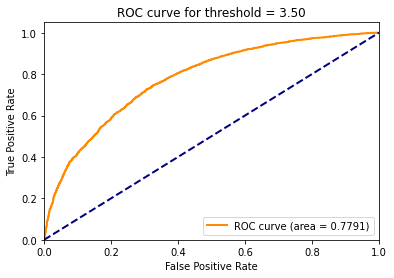

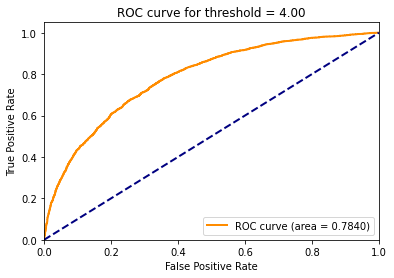

In [ ]:
trainset, testset = train_test_split(data, test_size=.1)
best_k_mfbias = 26
pred = SVD(n_factors=best_k_mfbias,biased=True).fit(trainset).test(testset)
threshold = [2.5, 3, 3.5, 4]

for thresh in threshold: 
  y_true = [0 if i.r_ui < thresh else 1 for i in pred]
  y_score = [i.est for i in pred]
   
  fpr = dict();tpr = dict();roc_auc = dict()
  fpr, tpr, thresholds = roc_curve(y_true, y_score)
  roc_auc = auc(fpr, tpr)
  plt.figure()
  lw = 2
  plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curve for threshold = %0.2f' % thresh);plt.legend(loc="lower right")
  plt.savefig(f'figures/q29_mfbias_roc_thresh_{str(thresh).replace(".","p")}', dpi=300, transparent=True)
  plt.show()

## Naive collaborative filtering 

#### Question 30: Naive collaborative filter to predict the ratings of the movies in the MovieLens dataset

In [9]:
from sklearn.metrics import mean_squared_error
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate, KFold, train_test_split
from surprise import accuracy
from sklearn.metrics import roc_curve, auc

reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1, rating_scale=(0.5, 5))
file_path = "ml-latest-small/ratings.csv"
data = Dataset.load_from_file(file_path, reader=reader)

In [10]:
ref = {}
for j in data.raw_ratings:
    if j[0] in ref.keys():
        ref[j[0]].append(j[2])
    else:
        ref[j[0]] = []
        ref[j[0]].append(j[2])

user = {}
for j in ref.keys():
    user[j] = np.mean(ref[j])

rmse = 0
kf = KFold(n_splits=10)
for trainset, testset in kf.split(data):
    pred = [user[i[0]] for i in testset]
    true = [i[2] for i in testset]
    rmse += np.sqrt(mean_squared_error(true,pred))
avg_rmse = rmse/10.0

print("Average RMSE for naive collaborative filter: ", avg_rmse)

Average RMSE for naive collaborative filter:  0.9346686342108225


#### Question 31: Naive collaborative filter to predict the ratings of the movies in the popular movie trimmed test set

In [11]:
ref = {}
for j in data.raw_ratings:
    if j[0] in ref.keys():
        ref[j[0]].append(j[2])
    else:
        ref[j[0]] = []
        ref[j[0]].append(j[2])

user = {}
for j in ref.keys():
    user[j] = np.mean(ref[j])

ref1 = {}
for j in data.raw_ratings:
    if j[1] in ref1.keys():
        ref1[j[1]].append(j[2])
    else:
        ref1[j[1]] = []
        ref1[j[1]].append(j[2])

rmse = 0
kf = KFold(n_splits=10)
for trainset, testset in kf.split(data):
    pop_trim = [j for j in testset if len(ref1[j[1]]) > 2]
    pred = [user[i[0]] for i in pop_trim]
    true = [i[2] for i in pop_trim]
    rmse += np.sqrt(mean_squared_error(true,pred))
avg_rmse = rmse/10.0

print("Average RMSE for naive collaborative filter with Popular Movie Trimming: ", avg_rmse)

Average RMSE for naive collaborative filter with Popular Movie Trimming:  0.9323164164821562


#### Question 32: Naive collaborative filter to predict the ratings of the movies in the unpopular movie trimmed test set

In [13]:
ref = {}
for j in data.raw_ratings:
    if j[0] in ref.keys():
        ref[j[0]].append(j[2])
    else:
        ref[j[0]] = []
        ref[j[0]].append(j[2])

user = {}
for j in ref.keys():
    user[j] = np.mean(ref[j])

ref1 = {}
for j in data.raw_ratings:
    if j[1] in ref1.keys():
        ref1[j[1]].append(j[2])
    else:
        ref1[j[1]] = []
        ref1[j[1]].append(j[2])

rmse = 0
kf = KFold(n_splits=10)
for trainset, testset in kf.split(data):
    unpop_trim = [j for j in testset if len(ref1[j[1]]) <= 2]
    pred = [user[i[0]] for i in unpop_trim]
    true = [i[2] for i in unpop_trim]
    rmse += np.sqrt(mean_squared_error(true,pred))
avg_rmse = rmse/10.0

print("Average RMSE for naive collaborative filter with Unpopular Movie Trimming: ", avg_rmse)

Average RMSE for naive collaborative filter with Unpopular Movie Trimming:  0.9712322165894877


#### Question 33: Naive collaborative filter to predict the ratings of the movies in the high variance movie trimmed test set

In [14]:
ref = {}
for j in data.raw_ratings:
    if j[0] in ref.keys():
        ref[j[0]].append(j[2])
    else:
        ref[j[0]] = []
        ref[j[0]].append(j[2])

user = {}
for j in ref.keys():
    user[j] = np.mean(ref[j])

ref1 = {}
for j in data.raw_ratings:
    if j[1] in ref1.keys():
        ref1[j[1]].append(j[2])
    else:
        ref1[j[1]] = []
        ref1[j[1]].append(j[2])

rmse = 0
kf = KFold(n_splits=10)
for trainset, testset in kf.split(data):
    highvar_trim = [j for j in testset if (len(ref1[j[1]]) >= 5 and np.var(ref1[j[1]]) >= 2)]
    pred = [user[i[0]] for i in highvar_trim]
    true = [i[2] for i in highvar_trim]
    rmse += np.sqrt(mean_squared_error(true,pred))
avg_rmse = rmse/10.0

print("Average RMSE for naive collaborative filter with High Variance Movie Trimming: ", avg_rmse)

Average RMSE for naive collaborative filter with High Variance Movie Trimming:  1.4786634431139551


## Performance comparision

#### Question 34: ROC curves for the k-NN, NNMF, and MF with bias based collaborative filters

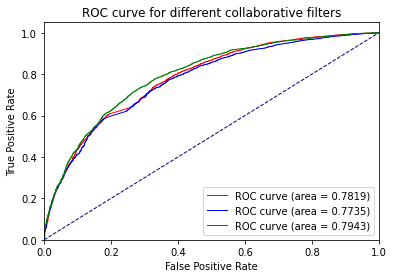

In [ ]:
trainset, testset = train_test_split(data, test_size=.1)
pred=[]
best_k_knn = 20
pred.append(KNNWithMeans(k=best_k_knn,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(testset))
best_k_nnmf = 16
pred.append(NMF(n_factors=best_k_nnmf,biased=False).fit(trainset).test(testset))
best_k_mfbias = 26
pred.append(SVD(n_factors=best_k_mfbias,biased=True).fit(trainset).test(testset))

plt.figure()
lw = 1
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

color=['r','b','g']

for p,c in zip(pred,color):
  y_true = [0 if i.r_ui < 3 else 1 for i in p]
  y_score = [i.est for i in p]
  fpr = dict();tpr = dict();roc_auc = dict()
  fpr, tpr, thresholds = roc_curve(y_true, y_score)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, color=c,lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)

plt.title('ROC curve for different collaborative filters');plt.legend(loc="lower right")
plt.savefig(f'figures/q34_roc', dpi=300, transparent=True)
plt.show()

## Ranking

#### Question 36: Precision-recall curves for k-NN collaborative filter

In [ ]:
threshold=3

#import statistics
from collections import defaultdict

min_k=20
prec_list=[]
recl_list=[]

for trainset, testset in kf.split(data):
  u_rating=defaultdict(list)
  pred=KNNWithMeans(k=min_k,sim_options={'name':'pearson'},verbose=False).fit(trainset).test(testset)
  #pred=(uid,iid,r_ui,est,_)
  for p in pred:
    u_rating[p[0]].append((p[2],p[3]))

  t=list(range(1,26))
  avg_prec=[]
  avg_recl=[]
  for i in t:
    precision={}
    recall={}
    #drop user if no groudtruth or rating less than t items
    for uid,val in u_rating.copy().items():
      if len(val[0])==0:
        del u_rating[uid]
      if len(u_rating[uid])<i:
        del u_rating[uid]

    for uid,val in u_rating.items():
      val.sort(key=lambda x:x[1], reverse=True)
      deno=sum((gtruth>=threshold) for (gtruth,_) in val[:i])
      gt_pos=sum((gtruth>=threshold) for (gtruth,_) in val[:])
      #recall
      if gt_pos==0:
        rcl=1
      else:
        rcl=deno/gt_pos
      recall[uid]=rcl   
      #precision
      prec=deno/i
      precision[uid]=prec

    avg_prec.append(sum(precision.values())/len(precision))
    avg_recl.append(sum(recall.values())/len(recall))
  prec_list.append(avg_prec)
  recl_list.append(avg_recl)

prec_arr = [np.array(x) for x in prec_list]
avg_prec_knn=[np.mean(k) for k in zip(*prec_arr)]
recl_arr = [np.array(x) for x in recl_list]
avg_recl_knn=[np.mean(k) for k in zip(*recl_arr)]
#avg_recl_knn=[statistics.mean(k) for k in recl_list]

In [ ]:
def pc_curve(avg_prec, avg_recl,method,q_num):

  t=list(range(1,26))
  
  plt.plot(t, avg_prec, marker='o')
  plt.title("precision curve with %s" %method)
  name1="q%i"%q_num + "_%s" %method + "_precision"
  plt.savefig('figures/%s'%name1, dpi=300, transparent=True)
  plt.show()

  plt.plot(t, avg_recl, marker='x')
  plt.title("recall curve with %s" %method)
  name2="q%i"%q_num + "_%s" %method + "_recall"
  plt.savefig('figures/%s'%name2, dpi=300, transparent=True)
  plt.show()

  plt.plot(avg_recl, avg_prec, marker='^')
  plt.title("precision-recall curve with %s" %method)
  plt.xlabel("average recall");plt.ylabel("average precision")
  name2="q%i"%q_num + "_%s" %method + "_precision-recall"
  plt.savefig('figures/%s'%name2, dpi=300, transparent=True)
  plt.show()

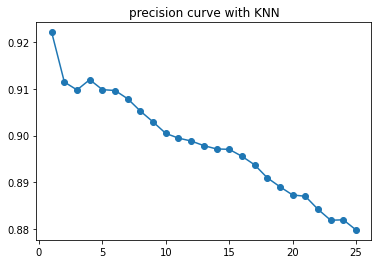

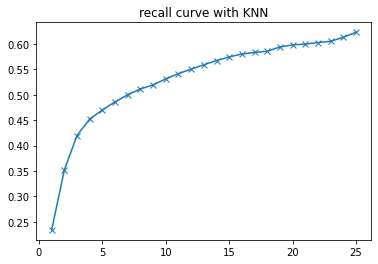

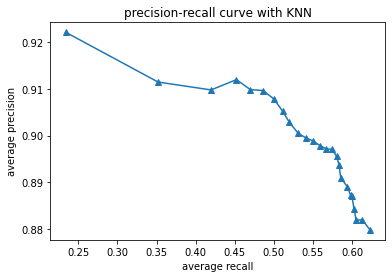

In [ ]:
pc_curve(avg_prec_knn, avg_recl_knn, "KNN",36)

#### Question 37: Precision-recall curves for NNMF-based collaborative filter

In [ ]:
min_k=16
prec_list=[]
recl_list=[]

for trainset, testset in kf.split(data):
  u_rating=defaultdict(list)
  pred=NMF(n_factors=min_k,biased=False).fit(trainset).test(testset)
  #pred=(uid,iid,r_ui,est,_)
  for p in pred:
    u_rating[p[0]].append((p[2],p[3]))

  t=list(range(1,26))
  avg_prec=[]
  avg_recl=[]
  for i in t:
    precision={}
    recall={}
    #drop user if no groudtruth or rating less than t items
    for uid,val in u_rating.copy().items():
      if len(val[0])==0:
        del u_rating[uid]
      if len(u_rating[uid])<i:
        del u_rating[uid]

    for uid,val in u_rating.items():
      val.sort(key=lambda x:x[1], reverse=True)
      deno=sum((gtruth>=threshold) for (gtruth,_) in val[:i])
      gt_pos=sum((gtruth>=threshold) for (gtruth,_) in val[:])
      #recall
      if gt_pos==0:
        rcl=1
      else:
        rcl=deno/gt_pos
      recall[uid]=rcl   
      #precision
      prec=deno/i
      precision[uid]=prec

    avg_prec.append(sum(precision.values())/len(precision))
    avg_recl.append(sum(recall.values())/len(recall))
  prec_list.append(avg_prec)
  recl_list.append(avg_recl)

prec_arr = [np.array(x) for x in prec_list]
avg_prec_nnmf=[np.mean(k) for k in zip(*prec_arr)]
recl_arr = [np.array(x) for x in recl_list]
avg_recl_nnmf=[np.mean(k) for k in zip(*recl_arr)]

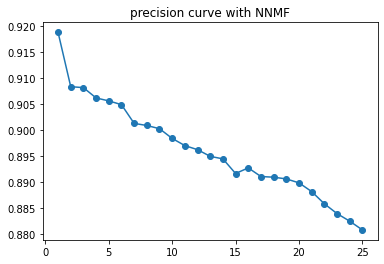

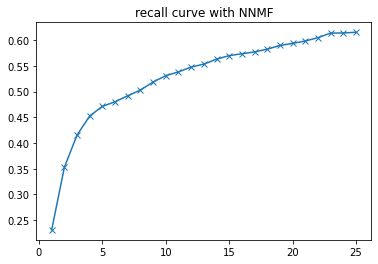

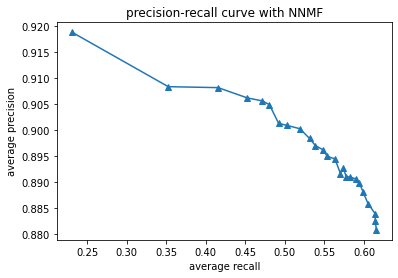

In [ ]:
pc_curve(avg_prec_nnmf, avg_recl_nnmf, "NNMF" ,37)

#### Question 38: Precision-recall curves for MF with bias-based collaborative filter

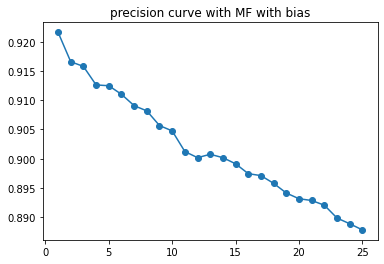

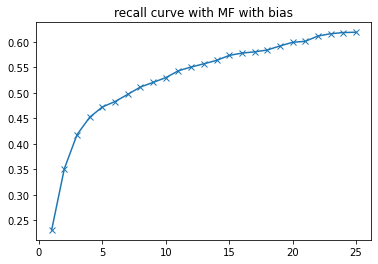

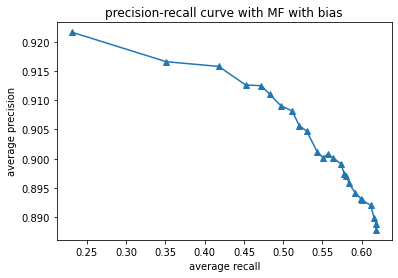

In [ ]:
min_k=26

prec_list=[]
recl_list=[]

for trainset, testset in kf.split(data):
  u_rating=defaultdict(list)
  pred=SVD(n_factors=min_k,biased=True).fit(trainset).test(testset)
  #pred=(uid,iid,r_ui,est,_)
  for p in pred:
    u_rating[p[0]].append((p[2],p[3]))

  t=list(range(1,26))
  avg_prec=[]
  avg_recl=[]
  for i in t:
    precision={}
    recall={}
    #drop user if no groudtruth or rating less than t items
    for uid,val in u_rating.copy().items():
      if len(val[0])==0:
        del u_rating[uid]
      if len(u_rating[uid])<i:
        del u_rating[uid]

    for uid,val in u_rating.items():
      val.sort(key=lambda x:x[1], reverse=True)
      deno=sum((gtruth>=threshold) for (gtruth,_) in val[:i])
      gt_pos=sum((gtruth>=threshold) for (gtruth,_) in val[:])
      #recall
      if gt_pos==0:
        rcl=1
      else:
        rcl=deno/gt_pos
      recall[uid]=rcl   
      #precision
      prec=deno/i
      precision[uid]=prec

    avg_prec.append(sum(precision.values())/len(precision))
    avg_recl.append(sum(recall.values())/len(recall))
  prec_list.append(avg_prec)
  recl_list.append(avg_recl)

prec_arr = [np.array(x) for x in prec_list]
avg_prec_mf=[np.mean(k) for k in zip(*prec_arr)]
recl_arr = [np.array(x) for x in recl_list]
avg_recl_mf=[np.mean(k) for k in zip(*recl_arr)]

pc_curve(avg_prec_mf, avg_recl_mf, "MF with bias" ,38)

#### Question 39: Precision-recall curves of k-NN, NNMF, and MF with bias collaborative filters

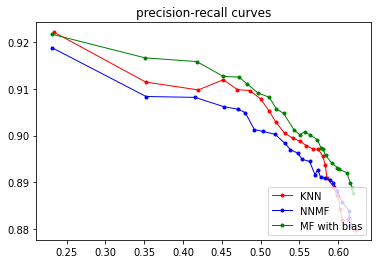

In [ ]:
plt.plot(avg_recl_knn, avg_prec_knn, lw=1, color='r',marker='.', label='KNN')
plt.plot(avg_recl_nnmf, avg_prec_nnmf, lw=1, color='b', marker='.', label='NNMF')
plt.plot(avg_recl_mf, avg_prec_mf, lw=1, color='g', marker='.', label='MF with bias')
plt.title('precision-recall curves'); plt.legend(loc="lower right")
plt.savefig(f'figures/q39_pc_curve', dpi=300, transparent=True)
plt.show()